In [48]:
import numpy as np
import keras
import shutil
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator

In [49]:
mask_data = "../input/facemask-dataset/Mask/Mask/" 
no_mask_data = "../input/facemask-dataset/No Mask/No Mask/"

In [50]:
total_mask_images = os.listdir(mask_data)
print("no of mask images:: {}".format(len(total_mask_images)))
total_nonmask_images = os.listdir(no_mask_data)
print("no of non-mask images:: {}".format(len(total_nonmask_images)))

no of mask images:: 208
no of non-mask images:: 131


In [51]:
os.makedirs('./train/mask')
os.makedirs('./train/no mask')
os.makedirs('./test/mask')
os.makedirs('./test/no mask') 

In [52]:
#choose random 100image for training and 30 for testing
for images in random.sample(total_mask_images,100):
    shutil.copy(mask_data+images, './train/mask')
for images in random.sample(total_mask_images,30):
    shutil.copy(mask_data+images, './test/mask')
for images in random.sample(total_nonmask_images,100):
    shutil.copy(no_mask_data+images, './train/no mask')
for images in random.sample(total_nonmask_images,30):
    shutil.copy(no_mask_data+images, './test/no mask')

In [53]:
train_batch = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, shear_range=0.2).\
            flow_from_directory('./train', target_size=(224,224), batch_size=32, class_mode = 'categorical')
test_batch = ImageDataGenerator(rescale=1./255).\
            flow_from_directory('./test', target_size = (224,224), batch_size=32, class_mode='categorical')

Found 199 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [54]:
train_batch.class_indices

{'mask': 0, 'no mask': 1}

In [56]:
class_mask = ['mask', 'no mask'] 

In [57]:
from keras.applications.vgg16 import VGG16
IMAZE_SIZE = [224,224] # for vgg 16
vgg = VGG16(input_shape=IMAZE_SIZE+[3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [58]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_76 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [59]:
for layers in vgg.layers:
    layers.trainable = False
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_76 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [60]:
#our  layers
flatten_layer = keras.layers.Flatten()(vgg.output)
prediction_layer = keras.layers.Dense(2, activation='softmax')(flatten_layer)

In [63]:
model = keras.models.Model(inputs = vgg.input, outputs = prediction_layer)

In [64]:
model.summary()

Model: "model_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_76 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [65]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
r = model.fit_generator(train_batch, validation_data=test_batch, epochs=10, steps_per_epoch=len(train_batch), validation_steps=len(test_batch))

/tmp/ipykernel_32/519320120.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_batch, validation_data=test_batch, epochs=10, steps_per_epoch=len(train_batch), validation_steps=len(test_batch))


Epoch 1/10
7/7 [==============================] - 6s 845ms/step - loss: 0.1255 - accuracy: 0.9497 - val_loss: 0.0615 - val_accuracy: 1.0000
Epoch 2/10
7/7 [==============================] - 6s 892ms/step - loss: 0.1072 - accuracy: 0.9598 - val_loss: 0.0456 - val_accuracy: 1.0000
Epoch 3/10
7/7 [==============================] - 6s 849ms/step - loss: 0.0779 - accuracy: 0.9799 - val_loss: 0.0422 - val_accuracy: 0.9833
Epoch 4/10
7/7 [==============================] - 6s 924ms/step - loss: 0.0741 - accuracy: 0.9749 - val_loss: 0.0488 - val_accuracy: 0.9667
Epoch 5/10
7/7 [==============================] - 6s 858ms/step - loss: 0.0654 - accuracy: 0.9849 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 6/10
7/7 [==============================] - 6s 834ms/step - loss: 0.0469 - accuracy: 0.9950 - val_loss: 0.0350 - val_accuracy: 1.0000
Epoch 7/10
7/7 [==============================] - 6s 813ms/step - loss: 0.0425 - accuracy: 0.9950 - val_loss: 0.0334 - val_accuracy: 1.0000
Epoch 8/10
7/7 [====

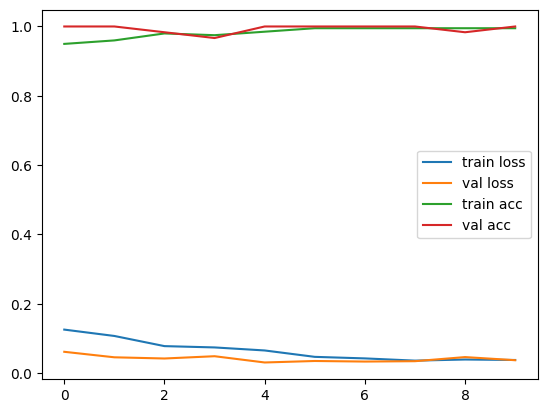

In [68]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()


plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()

1/1 [==============================] - 1s 735ms/step
no mask


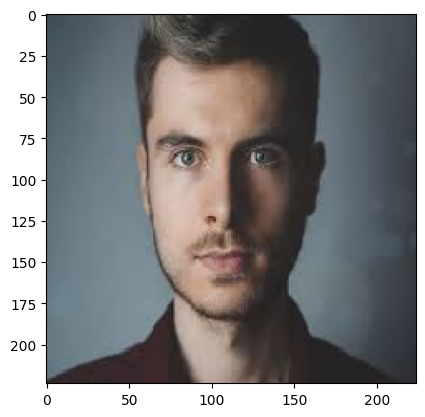

In [71]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img = image.load_img('/kaggle/input/facemask-dataset/No Mask/No Mask/No Mask100.jpg', target_size=(224,224))
x=image.img_to_array(img)
x = np.expand_dims(x,0)
y = preprocess_input(x)
pred = class_mask[np.argmax(model.predict(y))]
print(pred)
plt.imshow(img)

1/1 [==============================] - 0s 22ms/step


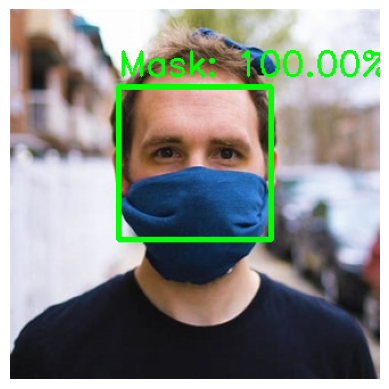

In [100]:
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
#model = load_model("mask_recog.h5")

def face_mask_detector(image_path):
    frame = cv2.imread(image_path)
    if frame is None:
        print("Error: Could not read the image.")
        return None
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,
                                        scaleFactor=1.1,
                                        minNeighbors=5,
                                        minSize=(60, 60),
                                        flags=cv2.CASCADE_SCALE_IMAGE)
    for (x, y, w, h) in faces:
        face_frame = frame[y:y+h, x:x+w]
        face_frame = cv2.cvtColor(face_frame, cv2.COLOR_BGR2RGB)
        face_frame = cv2.resize(face_frame, (224, 224))
        face_frame = img_to_array(face_frame)
        face_frame = np.expand_dims(face_frame, axis=0)
        preds = model.predict(face_frame)
        (mask, withoutMask) = preds[0]
        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 3)
    return frame

image_path = "/kaggle/input/11111/th.jpeg"  # Make sure to replace this with your image path as a string
output_image = face_mask_detector(image_path)

if output_image is not None:
    cv2.imwrite("output_image.jpg", output_image)
if output_image is not None:
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 21ms/step


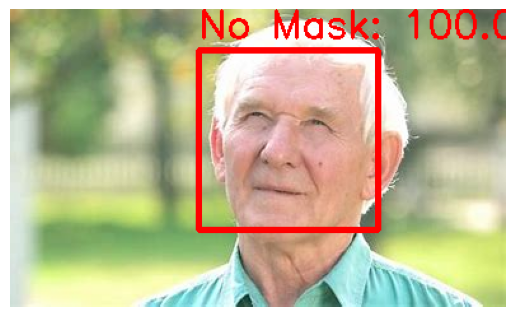

In [102]:
 
image_path = "/kaggle/input/22222/OIP (1).jpeg"   
output_image = face_mask_detector(image_path)

if output_image is not None:
    cv2.imwrite("output_image.jpg", output_image)
if output_image is not None:
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
